In [450]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import AllChem

import matplotlib.pyplot as plt

In [451]:
def get_morgan_fingerprint(smiles, radius=2, n_bits=2048):
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return np.array(fp, dtype=int)

In [452]:
df=pd.read_csv('./data/natural_products3.csv', index_col='CHEMBL_ID')
df = df.dropna()
df

,Is_Natural_Product,Is_Anaglesic,pka_acid,Smiles
CHEMBL_ID,,,,
CHEMBL70,1,1,10.260000,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5
CHEMBL485,1,1,13.780000,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2)N(C)CC[C@@]341
CHEMBL364713,1,0,13.070000,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2OC)OCO3)CCN1C
CHEMBL19224,1,0,8.917755,COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC
CHEMBL459324,1,0,8.917755,CC(=O)Oc1ccc2c3c1O[C@H]1[C@@H](OC(C)=O)C=C[C@H]4[C@@H](C2)N(C)CC[C@@]341
...,...,...,...,...
CHEMBL809,1,0,8.917755,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21
CHEMBL549,1,0,8.917755,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21
CHEMBL1508,1,0,8.917755,CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21


In [453]:
df['morgan_fingerprint']=[get_morgan_fingerprint(smiles) for smiles in df.Smiles]

X = df.copy().drop('Smiles', axis=1)
X

,Is_Natural_Product,Is_Anaglesic,pka_acid,morgan_fingerprint
CHEMBL_ID,,,,
CHEMBL70,1,1,10.260000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL485,1,1,13.780000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]"
CHEMBL364713,1,0,13.070000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]"
CHEMBL19224,1,0,8.917755,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]"
CHEMBL459324,1,0,8.917755,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]"
...,...,...,...,...
CHEMBL809,1,0,8.917755,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL549,1,0,8.917755,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
CHEMBL1508,1,0,8.917755,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"


# TSNE WITH KMEANS

In [454]:
data=np.hstack((np.array(list(X['morgan_fingerprint'])), X['pka_acid'].values.reshape(-1, 1), X['Is_Anaglesic'].values.reshape(-1, 1), X['Is_Natural_Product'].values.reshape(-1, 1)))

In [455]:
tsne = TSNE(n_components=2, verbose=2, perplexity=30, n_iter=5000)
tsne_results = tsne.fit_transform(data)
tsne_results

[t-SNE] Computing 86 nearest neighbors...
[t-SNE] Indexed 87 samples in 0.000s...
[t-SNE] Computed neighbors for 87 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 87 / 87
[t-SNE] Mean sigma: 3.046545
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 59.4155884, gradient norm = 0.4534139 (50 iterations in 0.274s)
[t-SNE] Iteration 100: error = 55.3413162, gradient norm = 0.6319444 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 60.6352577, gradient norm = 0.6550393 (50 iterations in 0.052s)
[t-SNE] Iteration 200: error = 58.9015732, gradient norm = 0.5403203 (50 iterations in 0.039s)
[t-SNE] Iteration 250: error = 58.9557724, gradient norm = 0.4873970 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.955772
[t-SNE] Iteration 300: error = 0.5219200, gradient norm = 0.0181003 (50 iterations in 0.019s)
[t-SNE] Iteration 350: error = 0.4072889, gradient norm = 0.0043069 (50 i

array([[-4.4519873e+00,  3.1165898e-01],
       [-5.1819496e+00, -3.4672517e-01],
       [-6.2939153e+00,  1.2846030e-01],
       [ 3.3442984e+00, -2.1688919e+00],
       [-4.1227856e+00,  7.1730623e-03],
       [-5.7335672e+00,  8.4780258e-01],
       [-5.2008224e+00, -4.4231960e-01],
       [ 4.7975451e-01, -9.8705482e-01],
       [-3.7829266e+00,  4.5002016e-01],
       [-4.1667075e+00, -1.9742414e+00],
       [-2.6521952e+00,  1.9882172e+00],
       [-3.3153358e+00,  2.4045918e+00],
       [-4.4533672e+00,  2.4628675e+00],
       [-2.9631643e+00,  1.6264827e+00],
       [ 1.0487268e+00, -1.0671924e+00],
       [-8.0186290e-01,  2.7554613e-02],
       [-8.1250006e-01, -1.0369030e+00],
       [-1.5667217e+00, -1.4143391e+00],
       [-1.6170185e+00, -1.4686335e+00],
       [-1.3467927e+00, -1.1667202e+00],
       [-3.9731095e+00, -2.0682769e+00],
       [-5.0843120e+00,  3.0287762e+00],
       [-5.0297446e+00,  1.6779670e+00],
       [-4.2296424e+00,  1.0511794e+00],
       [-4.96206

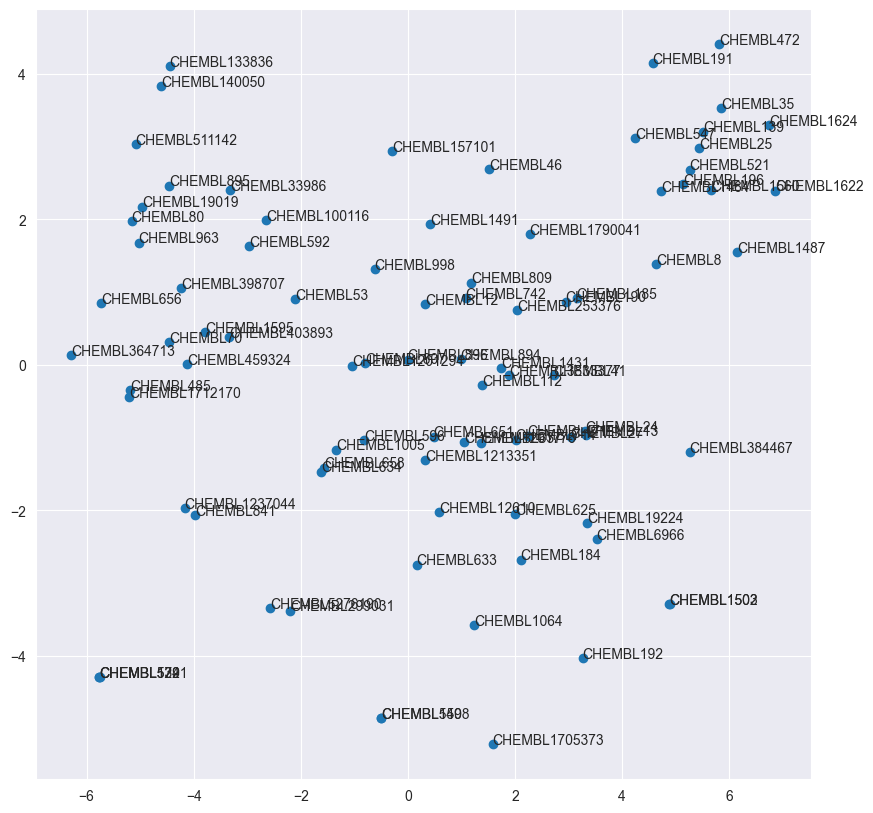

In [456]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i,0], tsne_results[i,1], df.iloc[i].name)
plt.show()

## K-means clustering on tsne results

In [457]:
#kmeans from the TSNE results
n_clusters=2
km = KMeans(n_clusters=n_clusters)
km.fit(tsne_results)
km

KMeans(n_clusters=2)

In [458]:
df['tsne_km_cluster'] = km.labels_
df

,Is_Natural_Product,Is_Anaglesic,pka_acid,Smiles,morgan_fingerprint,tsne_km_cluster
CHEMBL_ID,,,,,,
CHEMBL70,1,1,10.260000,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1
CHEMBL485,1,1,13.780000,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2)N(C)CC[C@@]341,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]",1
CHEMBL364713,1,0,13.070000,COc1ccc2c(c1OC)C(=O)O[C@@H]2[C@H]1c2c(cc3c(c2OC)OCO3)CCN1C,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]",1
CHEMBL19224,1,0,8.917755,COc1ccc(Cc2nccc3cc(OC)c(OC)cc23)cc1OC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]",0
CHEMBL459324,1,0,8.917755,CC(=O)Oc1ccc2c3c1O[C@H]1[C@@H](OC(C)=O)C=C[C@H]4[C@@H](C2)N(C)CC[C@@]341,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...]",1
...,...,...,...,...,...,...
CHEMBL809,1,0,8.917755,CN[C@H]1CC[C@@H](c2ccc(Cl)c(Cl)c2)c2ccccc21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",0
CHEMBL549,1,0,8.917755,CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1
CHEMBL1508,1,0,8.917755,CN(C)CCC[C@@]1(c2ccc(F)cc2)OCc2cc(C#N)ccc21,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",1


In [459]:
clusters = df.groupby('tsne_km_cluster')

In [460]:
cluster_centers = km.cluster_centers_
cluster_centers

array([[ 2.9387615 ,  0.20214897],
       [-3.5034952 , -0.2373672 ]], dtype=float32)

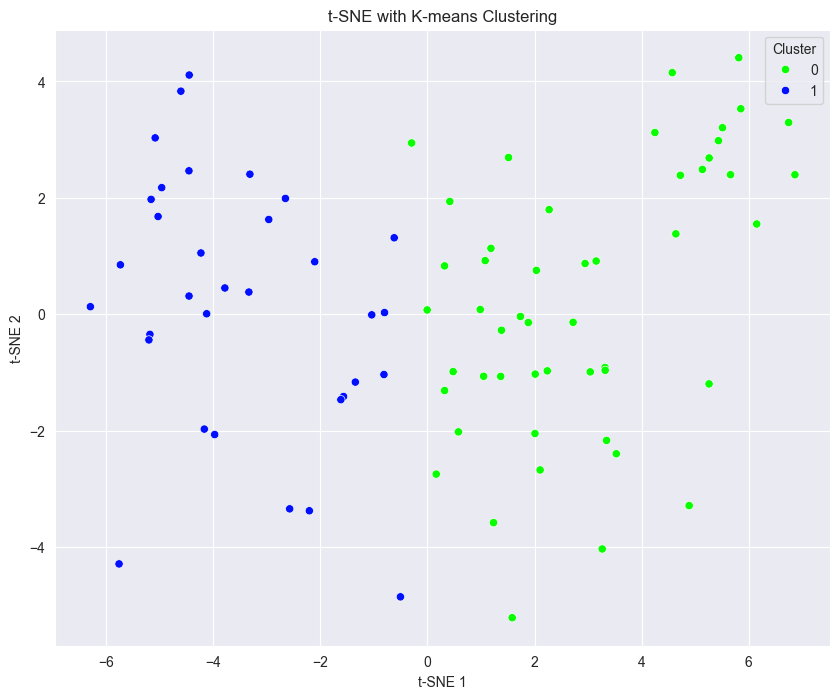

In [461]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters))
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

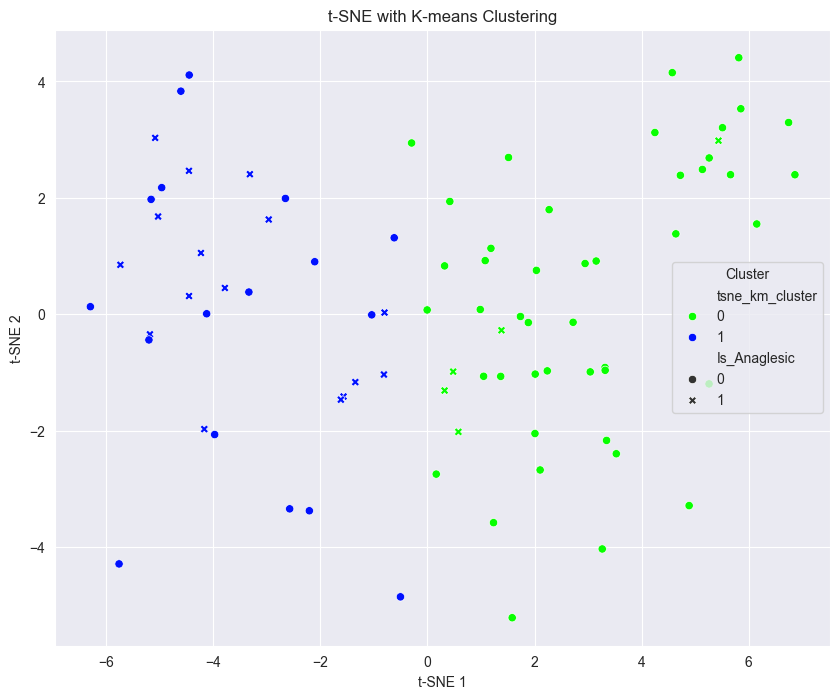

In [462]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters), style=df['Is_Anaglesic'])
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()


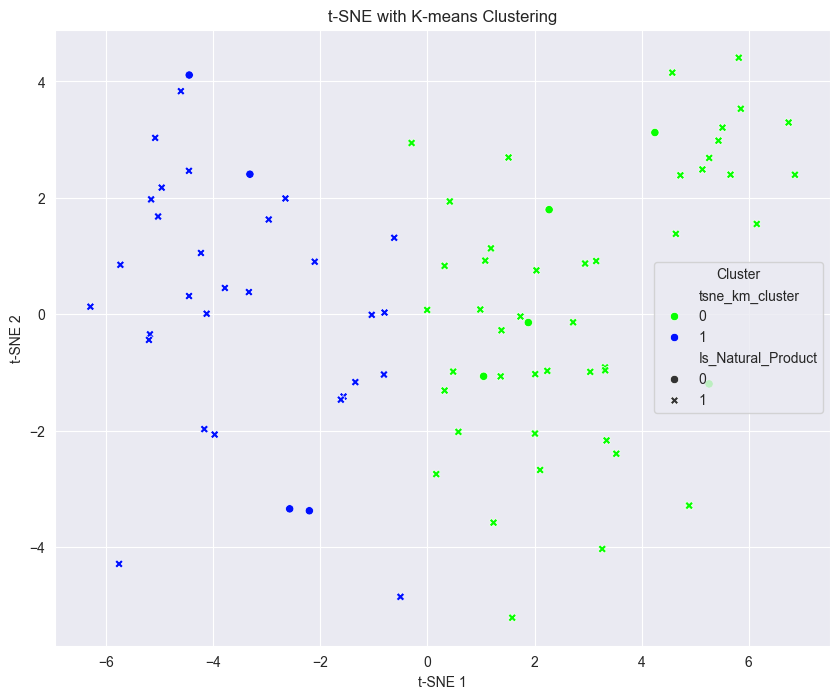

In [463]:
# Plot t-SNE results with cluster assignments
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=df['tsne_km_cluster'], palette=sns.color_palette("hsv", n_clusters), style=df['Is_Natural_Product'])
plt.title('t-SNE with K-means Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

# TSNE WITH DBSCAN

In [464]:
db = DBSCAN(eps=0.5, min_samples=4).fit(tsne_results)
labels = db.labels_ + 1

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

df['tsne_db_cluster']=labels

Estimated number of clusters: 2
Estimated number of noise points: 0


/var/folders/h5/c1fg9pqx7rvd63glykqthsg40000gn/T/ipykernel_7327/2332571677.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


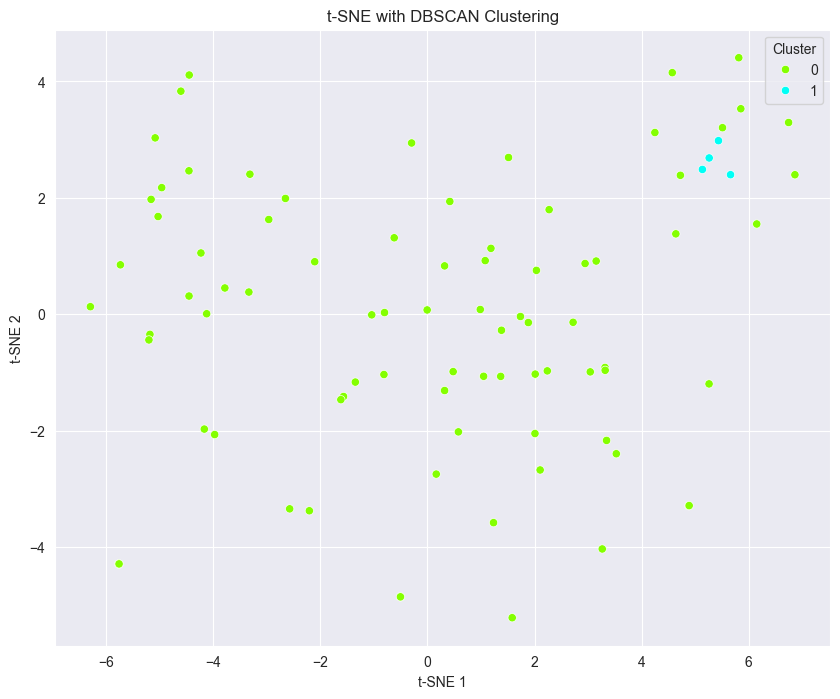

In [465]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=df['tsne_db_cluster'],
    palette=sns.color_palette("hsv", n_clusters_ + 1),  # +1 to include noise cluster if any
    data=df,
    legend="full"
)
plt.title('t-SNE with DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

## Just DBSCAN

In [466]:
db = DBSCAN(eps=0.5, min_samples=4).fit(data)
labels = db.labels_ + 1

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
df['db_cluster']=labels

Estimated number of clusters: 1
Estimated number of noise points: 0


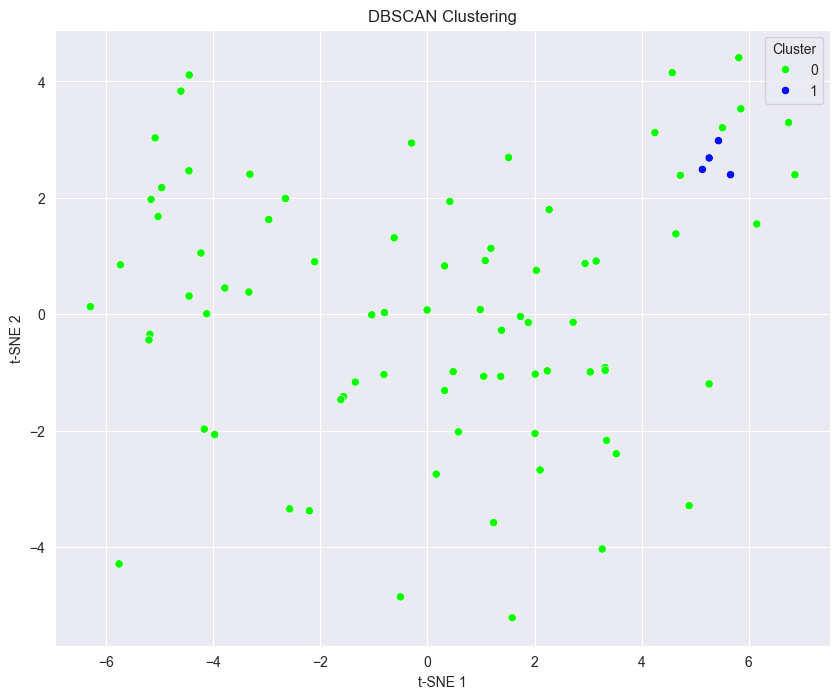

In [467]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=df['tsne_db_cluster'],
    palette=sns.color_palette("hsv", n_clusters_ + 1),  # +1 to include noise cluster if any
    data=df,
    legend="full"
)
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

In [468]:
df=df.drop('morgan_fingerprint', axis=1)
df=df.drop('Smiles', axis=1)
df.to_csv('./outputs/clustered_examples.csv')
df.to_excel('./outputs/clustered_examples.xlsx')